# Generative AI and Large Language Models

In this chapter we will explore recipes that use the generative aspect of the transformer models to generate text. As we touched upon the same in the `Transformers and its applications` chapter, the generative aspect of the transformer models uses the decoder component of the tranformer network. The decoder component is responsible for generating text based on the provided context.

With the advent of the GPT (General Purpose Transformers) family of large language models (LLMs), these have only grown in size and capability with each new version. Large language models like GPT-4 have been trained on large corpora of text and can match or beat the state-of-the-art on many NLP tasks. These LLMs have also build upon their generational capability and they can be instructed to generate text based on human prompting.

We will use generative models based on the transformer architecture for our recipes and explore:

* How to run a generative model or a LLM locally on our system
* How to make the LLM follow instruction prompting to generate text
* How to augment the LLM with custom data to answer questions based on it
* How to use different types of LLMs to generate code, SQL etc.
* How to use agents to perform actions to make decisions via an LLM and augment it to answer questions.




# <h1><center>Running an LLM locally</center></h1>

In this recipe, we will learn how to load a LLM locally using the CPU or GPU and generate text from it after giving it a starting text as seed input. We recommend that you use a system with at least 16 GB of RAM, or a system with a GPU that has at least 8 GB of VRAM. These examples were created on a system with 8 GB of RAM and an nVidia RTX 2070 GPU with 8 GB of VRAM. These examples will work without a GPU as long as there is 16 GB of RAM.

## How to do it

In this recipe, we will load the `Mistral-7B` model using the HuggingFace libraries. This model has a smaller size compared to other language models in its class, but can outperform them on several NLP tasks. The `Mistral-7B` model with 7 billion parameters can outperform the `Llama 2` model that has over 13 billion parameters. For more information on this, please refer to the Mistral model details on https://mistral.ai/news/announcing-mistral-7b/.

1. Do the necessary imports

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, GenerationConfig
import torch


2. Load the Mistral model `mistralai/Mistral-7B-v0.1` and the respective tokenizer.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForCausalLM.from_pretrained(
            "mistralai/Mistral-7B-v0.1", device_map="auto", load_in_4bit=True
        )

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1", padding_side="left")

3. Initialize a generation config. This generation config is passed to the model instructing it on how to generate the text.

In [3]:
generation_config = GenerationConfig(
    num_beams=4,
    early_stopping=True,
    eos_token_id=model.config.eos_token_id,
    pad_token_id=model.config.eos_token_id,
    max_new_tokens=900,
)

4. Initialize a seed sentence. In this case, we ask the LLM to tell us a step by step process to make an apple pie.

In [4]:
seed_sentence = "Step by step way on how to make an apple pie:"


5. Tokenize the seed sentence and get the model to generate the tokens IDs as the model output.

In [5]:
model_inputs = tokenizer([seed_sentence], return_tensors="pt").to(device)
generated_ids = model.generate(**model_inputs, generation_config=generation_config)


6. Decode the model token IDs into text and print them.

In [6]:
generated_tokens = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_tokens)

Step by step way on how to make an apple pie:

1. Preheat the oven to 200°C/400°F/gas mark 6.
2. Roll out the pastry on a lightly floured surface to the thickness of a £1 coin.
3. Line a 23cm/9in fluted tart tin with the pastry, leaving the excess pastry hanging over the edge.
4. Prick the base of the pastry with a fork.
5. Line the pastry with baking parchment and fill with baking beans.
6. Bake for 15 minutes.
7. Remove the baking beans and baking parchment.
8. Bake for a further 10 minutes, or until the pastry is golden-brown.
9. Remove from the oven and leave to cool.
10. Reduce the oven temperature to 180°C/350°F/gas mark 4.
11. Peel, core and slice the apples.
12. Place the apples in a large bowl.
13. Add the sugar, lemon juice and cinnamon.
14. Mix well.
15. Spoon the apple mixture into the pastry case.
16. Roll out the remaining pastry on a lightly floured surface to the thickness of a £1 coin.
17. Cut the pastry into 2.5cm/1in strips.
18. Weave the pastry strips over the apple

# How it works

In step 1, we do the necessary imports.

In step 2, we initialize the device, the `mistralai/Mistral-7B-v0.1` model and tokenizer respectively. We set the *device_map* parameter to *auto*, which lets the pipeline pick the available device to use. We use the *load_in_4bit* parameter to *True*. This lets us load the quantized model for the inference (or generation) step. Using a quantized model consumes less memory and lets us load the model locally on systems with limited memory. The loading of quantized model is handled by the *AutoModelForCausalLM* module and it downloads a model from the HuggingFace hub that has been quantized to the bit-size specified in the parameter.

In step 3, we initialize the text-generation configuration. We use the *num_beams* parameter to be 4. This parameter results in the generated text being more coherent and grammatically correct as the number of beams are increased. However, more number of beams also result in decoding (or text-generation) time. We set the *early_stopping* parameter to *True* as the generation of the next word is concluded as soon as the number of beams reaches the value specified in the *num_beams* parameter. The *eos_token_id* and *pad_token_id* are defaulted to use the models token IDs. These token IDs are used to specify the end-of-sentence and padding tokens that will be used by the model. The *max_new_tokens* parameter specifies the maximum number of tokens that will be generated. There are more parameters that can be specified for generating the text and we encourage the readers to play around with different values of the above specified parameters as well as any additional parameter for customizing the text generation. For more information, please refer to the transformer documentation on the GenerationConfig class at *https://github.com/huggingface/transformers/blob/main/src/transformers/generation/configuration_utils.py*.

In step 4, we initialize a seed sentence. This sentence acts as a prompt to the model for it to generate a step-by-step way to make an apple pie. As we saw in the output above, the model did generate a step-by-step recipe with proper numbering and arrangement of the text for the ingredients too.

In step 5, we tokenized the seed sentence to transform the text into the corresponding embedded representation and pass it to the model to generate the text. We also pass the *generation_config* instance to it. The model generates the token IDs as part of its generation.

In step 6, we decode the token IDs that were generated from the previous step. We set the value of the *skip_special_tokens* to *True*. The transformer model uses special tokens like *CLS* or *MASK* and to generate the text as part of the training. We don't want these to be in the output as we want to generate pure text as part of our output. We print the decoded (or generated) text.








# <h1><center>Running an LLM to follow instructions</center></h1>

In this recipe, we will learn how to get an LLM to follow instructions via prompting. We will use the `mistralai/Mistral-7B-Instruct-v0.1` model for this recipe. This model is build on top of the `mistralai/Mistral-7B-v0.1` LLM and has been tuned to follow instructions via prompts. Let's get started.

## How to do it

1. Do the necessary imports.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, logging
import torch

2. Set the logging level and device.

In [2]:
logging.set_verbosity_error()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

3. Load the Mistral model `mistralai/Mistral-7B-Instruct-v0.1` and the corresponding tokenizer.

In [ ]:
model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1", device_map="auto", 
                                             load_in_4bit=True, torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")

4. Create a prompt that sets up an instruction context that can be passed to the LLM. The LLM acts as per the instructions setup in the prompt.

In [4]:
prompt = [
    {"role": "user", "content": "What is your favourite country?"},
    {"role": "assistant", "content": "Well, I am quite fascinated with Peru."},
    {"role": "user", "content": "What can you tell me about Peru?"}
]

5. Set the generation config for the model.

In [5]:
generation_config = GenerationConfig(
    num_beams=4,
    early_stopping=True,
    eos_token_id=model.config.eos_token_id,
    pad_token_id=model.config.eos_token_id,
    max_new_tokens=900,
)

6. Tokenize the prompt load it into the device as setup in step 2.

In [6]:
encoded_prompt = tokenizer.apply_chat_template(prompt, return_tensors="pt")
model_inputs = encoded_prompt.to(device)

7. Call the *generate* method on the model to generate the output based on the tokenized input.

In [7]:
generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True,
                               generation_config=generation_config)

8. Decode the output token IDs into text and print it. We can see that the LLM generated the content about Peru in a well articulated way.

In [8]:
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

<s> [INST] What is your favourite country? [/INST]Well, I am quite fascinated with Peru.</s>  [INST] What can you tell me about Peru? [/INST] Peru is a country located in South America, and it is the 20th largest country in the world by land area. It is bordered by Ecuador to the north, Colombia to the northeast, Brazil to the east, Bolivia and Chile to the south, and the Pacific Ocean to the west.

Peru is known for its diverse geography and culture, with a range of landscapes including the Andes Mountains, the Amazon Rainforest, and the Pacific coastline. The country is also home to a number of ancient civilizations, including the Inca Empire, which was once the largest empire in pre-Columbian America.

Peru is also known for its rich biodiversity, with a wide variety of flora and fauna found throughout the country. The Amazon Rainforest, in particular, is home to a vast array of plant and animal species, many of which are found nowhere else on Earth.

In terms of its economy, Peru i

# How it works

In step 1, we do the necessary imports.

In step 2, we set the logging setting to error and lower its verbosity to keep the example output concise. We also initialize the device which in our case is *cuda*. 

In step 3, we initialize the `mistralai/Mistral-7B-Instruct-v0.1` model and the corresponding tokenizer. This model is based on the model `mistralai/Mistral-7B-v0.1` that we used in the previous recipe. This model has been fine-tuned for QA and interactive conversion. 

In step 4, we setup the prompt based on the model chat template. The prompt sets up an instruction for the model to follow. This chat template is used by the tokenizer in the subsequent step.

In step 5, we initialize the generation configuration similar to the previous recipe.

In step 6, we call the *apply_chat_template* method of the tokenizer with the prompt. This method reads the tokenizer's chat_template to ascertain the control tokens and format to use to tokenize the input accordingly. We load the tokenized input into the device.

In step 7, we generate the output for the given tokenized chat template input.

In step 8, we decode the token IDs returned by the model and print the result. As we observe from the output, the printed output also printed out the instruction that was sent to the model. The instruction follows the format of 
`<s>[INST] Instruction [/INST] Model answer</s>[INST] Follow-up instruction [/INST]`. The `<s>` and `<\s>` token specify the beginning and the end of the sentence respectively. The `[INST]` and `[/INST]` are the start and end of the instruction. In this particular case, we started our instruction with a conversation between the user and the agent. The conversation started with the question *What is your favourite country?*. This question was followed by the model answer in the form of *Well, I am quite fascinated with Peru.*. We then followed it up with another instruction by asking the question *What can you tell me about Peru?*. This methodology serves as a template for the LLM to learn our intent and generate an answer for the follow-up question based on the pattern we specified in our instruction prompt.





# There's more

Now that we have seen a way to instruct a model to generate text, we can just change the prompt and get the model to generate text for a completely different kind of question. Let's just change the prompt text to the following and use the same recipe to generate text based on the updated prompt.

In [9]:
prompt = [
    {"role": "user", "content": "Mary is twice as old as Sarah presently. Sarah is 6 years old.?"},
    {"role": "assistant", "content": "Well, what can I help you with?"},
    {"role": "user", "content": "Can you tell me in a step by step way on how old Mary will be after 5 years?"}
]

As we can see from the above output, the instruct model is able to understand the instruction quite clearly and is able to reason well and answered the question correctly. 

# <h1><center>Augmenting an LLM with external data</center></h1>

In the following recipres, we will learn how to get an LLM to answer questions on which it has not been trained on. These could include information that was created after the LLM was trained. The content on the world wide web keeps getting added on a daily basis. There is no one LLM can be trained on that context everyday. The Retriever Augmented Generation or RAG frameworks allow us to augment the LLM with additional content that can be sent as input to it for generating content for downstream tasks. As a basic introduction to RAG, we will augment an LLM with some content from a few web pages and ask some questions pertaining to the content contained in those pages. For this recipe, we will first load the LLM and ask it a few questions without providing it any context. We will then augment this LLM with additional context and ask the same questions. We will compare and contrast the answers, which will demonstrate the power of the LLM when coupled with augmented content.

# <h1><center>Execute a simple prompt-to-LLM chain</center></h1>

In this recipe we will use the Langchain *https://www.langchain.com/* framework to demonstrate Langchain framework with an example based on Langchain Expression Language (LCEL). We recommend that the readers visit the specified URL and install the python libraries by following the documentation on the site. In general, the command `pip install langchain` should be sufficient to get started. Let's start with a simple recipe based on the Langchain framework and extend it in the recipes that follow from there on.

So far in the book, we loaded all the models as part of the recipes. For the Langchain based recipes, we will improvise a bit on the model loading by storing them as out-of-process. This enables us to decouple to recipe code from the model loading code. This also brings in the additional benefits of faster recipe execution since the model is always resident in memory while we execute the recipe.


## How to do it

For the upcoming recipes, we will follow the Ollama framework (https://github.com/jmorganca/ollama) to load the models out of process. Follow the steps below to install the Ollama artifacts and run the `llama2` model. The following steps are for the Linux and WSL2 environments. For other OSes, please refer to the documentation on the site.

1. Execute the following command and install the necessary modules.

`curl https://ollama.ai/install.sh | sh`

2. Run the `llama2` model locally by executing the following command.

`ollama run llama2`

3. Once the model is up and running, we can now start with the recipe. Start with doing the necessary imports

In [1]:
from langchain.llms import Ollama
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

import warnings
warnings.filterwarnings('ignore')


4. Initialize the model .

In [2]:
MODEL_NAME = "llama2"
llm = Ollama(model=MODEL_NAME)

5. We initialize a chat prompt template which is of the defined type `ChatPromptTemplate`.

In [3]:
        
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a great mentor."),
    ("user", "{input}")
])


6. We initialize an output parser that is of the type `StrOutputParser`.

In [4]:
output_parser = StrOutputParser()

7. We initialize an instance of a chain. This chain passes the prompt to the llm, and the output of the llm is passed to the output parser.

In [5]:
chain = prompt | llm | output_parser

8. We create a simple query and ask the LLM to answer it. As we observe from the output, the advice presented by this example is actually a good one.

In [6]:
result = chain.invoke({"input": "how can i improve my software engineering skills?"})
print(result)



As a mentor, I'm glad you asked! Improving your software engineering skills is an ongoing process, and there are several ways to do so. Here are some suggestions:

1. Practice, practice, practice: The more you work on actual projects, the better you'll become at software engineering. Look for opportunities to contribute to open-source projects or volunteer to work on small projects for friends or family.
2. Learn new programming languages and technologies: Stay up-to-date with the latest tools and trends in the industry by learning new programming languages, frameworks, and tools.
3. Focus on problem-solving skills: Good software engineers are able to break down complex problems into smaller, manageable parts and come up with creative solutions. Practice solving problems on platforms like HackerRank or LeetCode to improve your problem-solving skills.
4. Learn about software design patterns: Understanding software design patterns can help you write more maintainable, scalable code. Stu

# How it works

In step 1, we installed the Ollama framework. This framework allows us to host the model out-of-process and connect to the model using a client interface. The Ollama framework manages the connection to the model and communicating with it.

In step 2, we run the Ollama runtime with the argument of `llama2`. The Ollama framework loads the `llama2` 7B model which has 7-billion parameters. The Ollama runtime allows loading bigger `llama2` models along with models from other providers. Once the command runs, it will start hosting the `llama2` model locally and is ready to accept commands.

In step 3, we do the necessary imports.

In step 4, we initialize the model. In our case we use the `llama2` model and wrap in the Ollama wrapper. The Ollama framework allows us to interface with the model using REST (or WebAPI) calls. The model is already running in a separate process as set up in step 2.

In step 5, we initialize a chat prompt template instance using the `ChatPromptTemplate` class. The `from_messages` method takes a series of (message type, template) tuples. The second tuple in the messages array has the *{input}* template. This signifies that this value will be passed later.

In step 6, we initialize an output parser. The `StrOutputParser` converts a chat message returned by an LLM instance to a string.

In step 7, we initialize the chain. The chain pipes the output of one component to the next. In this instance, the *prompt* is sent to the **llm* and the llm operates on the prompt instance. The output of this operation is a chat message. The chat message is then sent to the output_parser, which converts it into a string. In this step, we only setup the various components of the chain. 

In step 8, we invoke the chain and print the results. We pass the input argument in a dictionary. We set up the prompt template as a message that had the *{input}* placeholder defined there. As part of the chain invocation, the input argument is passed through to the template. The chain invokes the command. The chain is instructing the LLM to generate the answer to the question it asked via the prompt that we setup previously.



# <h1><center>Augment the LLM with external content</center></h1>

In this recipe, we will extend upon the previous example and build a chain that passes external content to the LLM and helps it answer questions based on that augmented content. We will first execute the chain without passing any external content and contrast the answer with the results when the chain is augmented with the external content. To keep the recipe simple, we will retrieve data from a recent web page that was published on the web after the model was trained. This ensures that the model is not answering from its memory and we will be able to better appreciate the role of content augmentation as part of this recipe. Let's get started.

## How to do it

1. Do the necessary imports.

In [1]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.llms import Ollama
from langchain.prompts import ChatPromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain_community.document_loaders import WebBaseLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import DocArrayInMemorySearch

from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel, RunnablePassthrough




2. Initialize the `llama2` model and `Ollama` based embeddings provider.

In [2]:
llm = Ollama(model="llama2")
embeddings_provider = OllamaEmbeddings()

3. In this recipe we will load the wikipedia entry on the 2024 summer olympics. We initialize a WebBaseLoader object and pass it the wikipedia URL for the 2024 summer olympics. We call the *load* method for the loader instance.

In [3]:
loader = WebBaseLoader(
    ["https://en.wikipedia.org/wiki/2024_Summer_Olympics"
     ]
)

docs = loader.load()

4. Initialize the text splitter instance of the type `RecursiveCharacterTextSplitter`. Use the text splitter instance to split the documents into chunks. 

In [4]:
text_splitter = RecursiveCharacterTextSplitter()
document_chunks = text_splitter.split_documents(docs)

5. We initialize a in-memory vector or embeddings store from the document chunks that we created in the previous step. We pass it the document chunks and the embeddings provider.

In [6]:
vector_store = DocArrayInMemorySearch.from_documents(document_chunks, embeddings_provider)

6. Define a question-answer template and instantiate a `ChatPromptTemplate` instance from the template.

In [7]:
template = """Answer the question based only on the following context:
                {context}

                Question: {question}
                """
prompt = ChatPromptTemplate.from_template(template)


7. Initialize the vector store retriever and the output parser. The retriever will provide the augmented content to the chain via the vector store.

In [8]:
retriever = vector_store.as_retriever(
                search_type="similarity"
            )
output_parser = StrOutputParser()

8. We initialize an instance of `RunnableParallel` so that the arguments can be passed across the various components of the chain in an implicit manner. Then we initialize the chain that chains together the prompt, llm and the output parser along with the `RunnableParallel` instance in the beginning of the chain.

In [9]:
setup_and_retrieval = RunnableParallel(
    {"context": retriever, "question": RunnablePassthrough()}
)
chain = setup_and_retrieval | prompt | llm | output_parser



9. Invoke the chain and print the results. As we observe in this case, the answers returned by the chain are accurate, though I am skeptical whether BreakDancing is indeed a sport as returned in the results.

In [10]:
result = chain.invoke("Where are the 2024 summer olympics being held?")
print(result)

The 2024 Summer Olympics are being held in Paris, France.


In [11]:
result = chain.invoke("What are the new sports that are being added for the 2024 summer olympics?")
print(result)

Answer: The 2024 Summer Olympics are expected to feature several new sports and disciplines, including:

1. Surfing: After making its debut at the 2016 Rio Olympics, surfing will return as a full medal sport in 2024.
2. Skateboarding: Skateboarding was introduced as an Olympic sport for the first time in 2020, and it will continue to be featured at the 2024 Games.
3. Rock climbing: Rock climbing made its Olympic debut in 2020, and it is expected to return in 2024.
4. Breaking: Also known as breakdancing, breaking will make its Olympic debut in 2024 as a competitive dance sport.
5. Karate: Karate was added to the Olympic program in 2018 and will be featured at the 2024 Games.
6. Sport climbing: Sport climbing was introduced as an Olympic sport in 2020 and will continue to be featured in 2024.
7. Urban mountain biking: This new discipline is a variation of mountain biking that takes place on urban terrain, such as parks and streets.
8. 3x3 basketball: This version of basketball features 

# How it works

In step 1, we do the necessary imports. 

In step 2, we load the `llama2` model via the Ollama wrapper. The model make a call to the Ollama runtime in the later steps. We also load the embedding provider via the `OllamaEmbeddings` instance. The provider connects to the running instance of the Ollama runtime via REST. The default value for the embeddings model is `llama2`. It is a requirement that the Ollama runtime has loaded the `llama2` model and is running in the background when we make call to via the chain execution later. The model (or LLM) and the embeddings provider depend on it.

In step 3, we load the URLs via the WebBaseLoader class. It extracts the HTML content and the main content on each HTML page is parsed. The *load* method on the loader instance triggers the extraction of the content from the URLs.

In step 4, we initialize the text splitter instance and call the *split_documents* method on it. This splitting of the document is needed step as an LLM can only operate on a context of a limited length. For some large documents, the length of the document exceeds the maximum context length supported by the LLM. Breaking a document into chunks and using that to match the query text allows us to retrive more relevant parts from the document. The `RecursiveCharacterTextSplitter` splits the document based on newline, spaces, and double-newline characters.

In step 5, we initialize a vector store. This vector store used in our recipe is an in-memory store. It is recommended that a vector database with persistency support is used in production. To keep this example self-contained and require fewer components, we decided to use an in-memory vector store. We initialize the vector store with the document chunks and the embeddings provider. The vector store creates embeddings of the documents chunks and stores them along with the document metadata. For production grade applications, we recommend the reader to visit the URL: https://python.langchain.com/docs/integrations/vectorstores/ and select a vector store based on their requirements. The Langchain framework is versatile and works with a host of prominent vector stores.

In step 6, we define a chat template and create an instance of `ChatPromptTemplate` from it. This prompt template instructs the LLM to answer the question for the given context. This context is provided by the augmentation step.

In step 7, we initialize a retriever and an output parser. For the retriever, we call the *as_retriever* method of the vector store instance. The retriever returned by the method is used to retrieve the content from the vector store. The *as_retriever* method is passed an argument `search_type` with the value *similarity*, which is also the default option.. This means that the vector store will be searched against the question text based on similarity. The other options supported are *mmr*, which penalizes search results of the same type and returns diverse results, and *similarity_score_threshold* which operates the same as the *similarity* search type, but can filter out the results based on a threshold. These option also support an accompanying dictionary argument that can be used to tweak the searching parameters. We recommend that the readers refer to the Langchain documentation and tweak the parameters based on their requirements and empirical findings.

In step 8, we set up the chain. The chain sequence starts with the `setup_and_retrieval` component that sets up the retriever as context provider. The *question* argument is assumed to be passed later on by the chain. The next component is the `prompt`, which is supplied the context value and the populated prompt is sent to the `llm`. The llm pipes or forwards the results to the string output_parser, which is designed to return the string contained in the output of the llm. There is no execution happening in this step. We are only setting up the chain.

In steps 9 and 10, we invoke the chain with two different questions. For each invocation, the question text is matched by similarity against the vector store, the relevant document chunks are returned, followed by the llm using these document chunks as context and using it to answer the respective questions.

# <h1><center>Create a Chatbot using an LLM</center></h1>

In this recipe, we will create a chatbot using the Langchain framework. We learnt in the previous recipe on how to ask questions to an LLM based on a piece of content. Though the LLM was able to answer questions accurately, the interaction with the LLM was completely stateless. The LLM is looking at each question in isolation and ignores any previous interactions or questions that it was asked. In this recipe, we will use an LLM to create a chat interaction, where it will be aware of the previous conversations and use the context from them to answer subsequent questions.

## How to do it

1. Do the necessary imports.

In [1]:
from langchain.llms import Ollama
import bs4
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.document_loaders import WebBaseLoader

2. Initialize the `llama2` model and `Ollama` based embeddings provider.

In [2]:
llm = Ollama(model="llama2")
embeddings_provider = OllamaEmbeddings()

3. In this recipe we will load a web page that has the content based on which we would want to ask questions. You are open to choose any webpage of your choice. We initialize a WebBaseLoader object and pass it the URL. We call the *load* method for the loader instance. 

In [3]:
loader = WebBaseLoader(
    ["https://lilianweng.github.io/posts/2023-06-23-agent/"
     ]
)

docs = loader.load()

4. Initialize the text splitter instance of the type `RecursiveCharacterTextSplitter`. Use the text splitter instance to split the documents into chunks. 

In [4]:
text_splitter = RecursiveCharacterTextSplitter()
document_chunks = text_splitter.split_documents(docs)

5. We initialize a in-memory vector or embeddings store from the document chunks that we created in the previous step. We pass it the document chunks and the embeddings provider. We also initialize the vector store retriever and the output parser. The retriever will provide the augmented content to the chain via the vector store.

In [6]:
vector_store = DocArrayInMemorySearch.from_documents(document_chunks, embeddings_provider)
retriever = vector_store.as_retriever()
output_parser = StrOutputParser()

6. We define a system prompt that instructs the system to formulate a question based on the previous chat context.

In [7]:
contextualize_q_system_prompt = """Given a chat history and the latest user question \
which might reference context in the chat history, formulate a standalone question \
which can be understood without the chat history. Do NOT answer the question, \
just reformulate it if needed and otherwise return it as is."""

contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{question}"),
    ]
)

7. We initialize a contexualized chain that uses the contextual system prompt created in the previous step.

In [8]:
contextualize_q_chain = contextualize_q_prompt | llm | output_parser

8. We initialize another system prompt. This system prompt is setup to use chat history to answer questions.

In [9]:
qa_system_prompt = """You are an assistant for question-answering tasks. \
Use the following pieces of retrieved context to answer the question. \
If you don't know the answer, just say that you don't know. \
Use three sentences maximum and keep the answer concise.\

{context}"""
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", qa_system_prompt),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{question}"),
    ]
)

9. We initialize two helper methods. The `contextualized_question` method returns the contextualized chain if a chat history exists, else it returns the input question. The `format_docs` method concatenates the page content for each document separated by two newline characters.

In [10]:
def contextualized_question(input: dict):
    if input.get("chat_history"):
        return contextualize_q_chain
    else:
        return input["question"]

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)



10. We initialize a chain that uses the contextualized question as the input, pipes it to the retriever  ********

In [11]:
rag_chain = (
        RunnablePassthrough.assign(
            context=contextualized_question | retriever | format_docs
        )
        | qa_prompt
        | llm
)



11. We initialize a chat_history and invoke the chain to answer a question. We extend the chat history sequence with the returned answer.

In [13]:
chat_history = []

question = "What is a large language model?"
ai_msg = rag_chain.invoke({"question": question, "chat_history": chat_history})
print(ai_msg)
chat_history.extend([HumanMessage(content=question), AIMessage(content=ai_msg)])



A large language model (LLM) is a type of artificial intelligence (AI) model that is trained on a large corpus of text data to generate language outputs that are coherent and natural-sounding. The model can be used for a variety of applications, such as text generation, language translation, and conversational dialogue.

The key characteristics of an LLM include:

1. Large scale: LLMs are trained on vast amounts of text data, typically in the range of tens to hundreds of millions of words. This allows the model to learn patterns and relationships in language that would be difficult or impossible to capture with smaller models.
2. Deep learning architecture: LLMs typically use deep learning architectures, such as transformer-based models, to process and generate text. These models are trained using backpropagation and other machine learning techniques to optimize the model's performance.
3. Multi-task learning: Many LLMs are designed to perform multiple tasks simultaneously, such as lan

12. We invoke the chain again with a second question that needs contextualizing. We provide the chain with the chat history and print the answer to the second question.

In [14]:
second_question = "Can you explain the reasoning behind calling it large?"
second_answer = rag_chain.invoke({"question": second_question, "chat_history": chat_history})
print(second_answer)

Sure! The term "large" in the context of large language models (LLMs) refers to the scale and scope of the training data used to train these models. Here are some reasons why LLMs are called "large":

1. Volume of training data: LLMs are trained on vast amounts of text data, typically ranging from tens to hundreds of millions of words. This allows the model to learn patterns and relationships in language that would be difficult or impossible to capture with smaller models.
2. Depth of training data: In addition to the sheer volume of data, LLMs are often trained on diverse and representative datasets that cover a wide range of linguistic styles, genres, and contexts. This helps ensure that the model can handle complex language tasks and generate coherent text in a variety of settings.
3. Complexity of model architecture: LLMs typically use deep learning architectures with many layers and parameters, which allow them to learn complex patterns and relationships in language. These models 

# How it works

For steps 1-5, we perform the same steps as we did in the recipe prior to this. To avoid repetition, we ask the reader to refer to the explanations in the *How it works* section of the previous recipe.

In step 6, we initialize a contextualized system prompt. A *system* prompt defines the persona and the instruction that is to be followed by the LLM. In this case, we use the system prompt to contain the instruction that the LLM has to use the chat history to formulate a standalone question. We initialize the prompt instance with the system prompt definition and set it up with the expectation that it will have access to the *chat_history* variable that will be passed to it at run-time. We also set it up with the *question* template that will also be passed at run-tume. 

In step 7, we initilize the contextualized chain. This chain uses the chat history and a given follow-up question from the user and sets up the context for it. As you saw in step 11 and 12 previously, where we asked a simple question followed by another question. The subsequent question did not provide any context and just referred to it as `it`. 

In step 8, we initialize a system prompt similar to what we did in the previous recipe based on RAG. This prompt just sets up a prompt template. However, we pass this prompt a contextualized question as the chat history grows. This prompt always answers a contextualized question, barring the first one.

In step 9, we define two helper functions that are passed to the RAG chain created downstream. The `contextualized_question` method returns the original question as posed by the user if the chat history is not present. This is the typical scenario for the first question. Once the chat_history is present, it returns the contextualized chain. The `format_docs` method just appends the content of all the repository docs separated by newlines.

In step 10, we set up a chain. We use the `RunnablePassthrough` class to set up the context. The `RunnablePassthrough` class by definition allows us to pass the input or add additional data to the input via dictionary values. The `assign` method will take a key and will assign the value to this key. In this case, the key is `context` and the assigned value for it is the result of the chained evaluation of the *contextualized question*, the *retriever*, and the *format_docs*. Putting that in the perspective of the whole recipe, for the first question, the context will the set of matched records for the question. For the second question, the context will use the *contextualized question* from the chat history, retrieve a set of matching records and pass that as the context.

In step 11, we initialize a chat history array. We ask a simple question to the chain by invoking it. What happens internally is that the question in this case is the contextualized question since there is no chat history present at this point. The rag_chain just answers the question simply and prints the answer. We also extend the chat_history with the returned message. 

In step 12, we ask the chain a subsequent question without providing much contextual cue. Internally, the `rag_chain` and the `contextualize_q_chain` work in tandem to answer this question. The `contextualize_q_chain` uses the chat history to add more context to the question, retrieves matched records, and sends that as context to the `rag_chain`. The `rag_chain` used the context and the contextualized question to answer the subsequent question.

**Note**: We provided a basic workflow on how to execute RAG based flows. We recommend that the reader refer the langchain documentation and use the necessary components to run solutions in production. Some of these would be, using a persistent vector DB store, using concrete types like `BaseChatMessageHistory:` and `RunnableWithMessageHistory` to better manage chat histories. Also, use LangServe to expose endpoints to serve requests.

# <h1><center>Generate code using an LLM</center></h1>

In this recipe we will explore how as LLM can be used to generate code, and we will validate it by executing the generated code.



## How to do it

1. Do the necessary imports.

In [1]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL

from langchain.llms import Ollama

2. Define a template and initialize a prompt template from it.

In [2]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

3. Initilize the model. In this instance, as we are working to generate code, we choose to use the `codellama` model.

In [3]:
model = Ollama(model="codellama")

4. We initialize the chain with the prompt and the model.

In [5]:
chain = prompt | model | StrOutputParser()

5. We invoke the chain and print the result. As we can observe from the output, then code generated by the model looks fairly good.

In [6]:
result = chain.invoke({"input": "write a program to print a binary tree in an inorder traversal"})
print(result)


```
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def inorder_traversal(root):
    if root is None:
        return []
    return inorder_traversal(root.left) + [root.value] + inorder_traversal(root.right)

root = Node(1)
root.left = Node(2)
root.right = Node(3)
print(inorder_traversal(root)) # Output: [2, 1, 3]
```


6. Let's attempt to do something different.

In [7]:
result = chain.invoke({"input": "write a program to generate a 512-bit AES hash"})
print(result)


```python
import hashlib

def generate_aes_hash(input_str):
    """Generate a 512-bit AES hash from a given input string"""
    return hashlib.sha512(input_str.encode()).hexdigest()
```
This function takes a string as an input and returns a hexadecimal representation of the SHA-512 hash of that string using the `hashlib` module in Python. The resulting hash will be 512 bits long, which is the length of a SHA-512 hash.


# How it works

In step 1, we do the necessary imports.

In step 2, we define a template. This template defines the instruction or the system prompt that is sent to the model as the task description. In this case, the template defines an instruction to generate python code based on user's requirement. We use this template to initialize a prompt object. The initilized object is of the type `ChatPromptTemplate`. This object lets us send requirements to the model in an interactive way. We can converse with the model based on our instructions to generate several code snippets without having to load the model each time.

In step 3, we initialize the `codellama` model. The model loaded via the Ollama framework loads the trained `Llama 2` model. This model trains the `Llama2` model on code specific datasets and supports code generation in Python, C++, Java, C# and more.

In step 4, initiliaze the chain with the prompt, model and then output parser.

In step 5, we invoke the chain and print the generated code. The generated code is reasonably good, with the Node class having a constructor along the *inorder_traversal* helper method. It also prints out the instruction to use the class.

In step 6, we invoke the chain with another requirement and print the generated code. The generation in this case is acceptable too. The model is smart enough to even generate the necessary import statement for the *hashlib* library. 

So far, we have used the `codellama model` generate the code and the generation was reasonably good. However, we caution the reader to not just trust the generated output as is. Utmost care should be taken to validate the functionality of the generated code via a suite of unit,integration and functional tests for production scenarios. 

# There's more

So far, we have used locally hosted models for generation. Let's see how the `ChatGPT` model from Open AI fairs in this regard. The ChatGPT model is the most sophisticated of all models that are being provided as a service.

We only need to change what we do in step 3. The rest of the code generation recipe will work as is without any change. The change for step 3 is a simple 3-step process.

a. Add the necessary import statement to your list of imports.

In [21]:
from langchain_openai import ChatOpenAI

b. Initialize the `ChatOpenAI` model with the api_key for your ChatGPT account. Though, ChatGPT is free to use via the browser, tha API usage requires a key and requires account credits to make calls to it. Please refer to the documentation at https://openai.com/blog/openai-api for more information. You can store the api_key in a environment variable and read it.

In [24]:
api_key = os.environ.get('OPENAI_API_KEY')
model = ChatOpenAI(openai_api_key=api_key)

c. Invoke the chain. As we observe that the code generated by ChatGPT is more reader friendly.

In [25]:
result = chain.invoke({"input": "write a program to generate a 512-bit AES hash"})
print(result)

Sure! Here's an example of how you can generate a 512-bit AES hash using the `hashlib` module in Python:

```python
import hashlib

# Create a new AES hash object
aes_hash = hashlib.new('sha512')

# Update the hash object with your data
data = b'Hello, World!'
aes_hash.update(data)

# Get the hex representation of the 512-bit hash
hash_hex = aes_hash.hexdigest()

print("512-bit AES hash:", hash_hex)
```

This code uses the SHA-512 algorithm, which generates a 512-bit hash. You can update the `data` variable with the input you want to hash.


# <h1><center>Generate a SQL query using human defined requirements</center></h1>

In this recipe, we will learn how to use an LLM to infer the schema of a database and generate SQL queries based on human input. The human input would be a simple question. The LLM will use the schema information along with the human question to generate the correct SQL query. Also, we will connect to a database that has populated data, execute the generated SQL query and present the answer in a human readable format. Let's get started.

For this recipe we will use a SQLite3 DB. Please follow the instructions on https://github.com/jpwhite3/northwind-SQLite3 to setup the DB locally.

1. Do the necessary imports.

In [34]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

from langchain_community.utilities import SQLDatabase

from langchain.llms import Ollama
from langchain_openai import ChatOpenAI

import os

2. We define the prompt template and create a `ChatPromptTemplate` instance using it. 

In [35]:
template = """You are a SQL expert. Based on the table schema below, write just the SQL query without the results that would answer the user's question.:
{schema}

Question: {question}
SQL Query:"""
prompt = ChatPromptTemplate.from_template(template)

3. We connect to the local DB running on your machine and get the database handle. In this recipe, we are using a file based DB that resides locally on the filesystem. Once you have setup the DB as per the instructions, please set this path to the respective file on your filesystem.

In [36]:
db = SQLDatabase.from_uri("sqlite:///db/northwind-SQLite3/dist/northwind.db")

4. We define a method that gets will get the schema information using the database handle.

In [37]:
def get_schema(_):
    return db.get_table_info()

5. We define a method that will run a query using the database handle.

In [38]:
def run_query(query):
    return db.run(query)

6. We read the OpenAI API key from the environment variable and initialize the model.

In [ ]:
api_key = os.environ.get('OPENAI_API_KEY')
model = ChatOpenAI(openai_api_key=api_key)

7. We create a chain that uses the database schema, the prompt, the model and an output parser.

In [42]:
sql_response = (
    RunnablePassthrough.assign(schema=get_schema)
    | prompt
    | model.bind(stop=["\nSQLResult:"])
    | StrOutputParser()
)

8. We invoke the chain by passing it a simple question. We expect the chain to return a SQL query as part of the response.

In [43]:
sql_response.invoke({"question": "How many employees are there?"})

'SELECT COUNT(*) FROM Employees'

9. We invoke another query for further testing the LLM whether it can infer the whole schema.

In [11]:
sql_response.invoke({"question": "How many employees have been tenured for more than 11 years?"})

"SELECT COUNT(*) \nFROM Employees \nWHERE HireDate <= DATE('now', '-5 years')"

10. We now initialize another template that will instruct the model to use the SQL query and execute it on the database.

In [44]:
template = """Based on the table schema below, question, sql query, and sql response, write a natural language response:
{schema}

Question: {question}
SQL Query: {query}
SQL Response: {response}"""
prompt_response = ChatPromptTemplate.from_template(template)

11. We create a full chain that uses the previous chain to generate the SQL query, and executes that on the database.

In [47]:
full_chain = (
    RunnablePassthrough.assign(query=sql_response).assign(
        schema=get_schema,
        response=lambda x: run_query(x["query"]),
    )
    | prompt_response
    | model
)

12. We invoke the full chain with the same human question that we asked it earlier. The chain produces a simple human readable answer.

In [48]:
result = full_chain.invoke({"question": "How many employees are there?"})
print(result)

content='There are 9 employees in the database.'


13. We invoke the chain with a slighly more complex query. We observe that the simple response from the invocation is indeed accurate. The accompanying screenshot does confirm the accuracy of the results.

In [23]:
result = full_chain.invoke({"question": "Give me the name of employees who have been tenured for more than 11 years?"})
print(result)

content='The employees who have been tenured for more than 11 years are Nancy Davolio, Andrew Fuller, and Janet Leverling.'


Query results that were returned while querying the database manually using the SQLite command line interface.

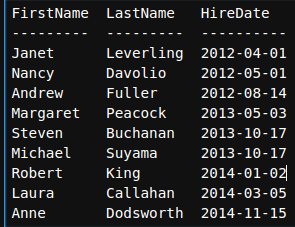

# How it works

In step 1, we do the necessary imports.

In step 2, we define a template. This template defines the instruction or the system prompt that is sent to the model as the task description. In this case, the template defines an instruction to generate a SQL statement based on user's requirement. We use this template to initialize a prompt object. The initialized object is of the type `ChatPromptTemplate`. This object lets us send requirements to the model in an interactive way. We can converse with the model based on our instructions to generate several SQL statements without having to load the model each time.

In step 3, we get a handle to the database. We will use this handle in the subsequent calls to make connection with the DB and perform operations on it.

In step 4, we define a method named *get_schema* that returns the schema information for all the DB objects like tables, indexes. This schema information is used by the LLM in the following calls to infer the table structure and generate queries from it.

In step 5, we define a method named *run_query* that runs the query on the DB and returns the results. The results are used by the LLM in the following calls to infer the result from and generate a human readable, friendly answer.

In step 6, we read the *api_key* from an environment variable and initialize the *ChatGPT* model. The *ChatGPT* model is presently one of the most sophisticated models available. Our experiments with using *CodeLlama* for this recipe was returning queries with a lot of noisy characters, as opposed to *ChatGPT*, which was precise and devoid of any noise.

In step 7, we create a chain that wires the schema, prompt, model and an output parser. The schema is sourced from the *get_schema* method and passed as a dictionary value to the downstream chain components. The prompt uses the schema to fill in the place holder *schema* element in its template. The model receives the prompt and the schema information and generates the query. The *bind* method of the model is *Runnable* sequence. This method cuts off the output from the model at the first instance of the strings that are passed as the parameter to it. Once the model generates the output, it is parsed by the string parser.

In step 8, we invoke the chain and print the results. The generated query by the LLM is accurate and it was able to infer the schema and generate the correct query for our requirements.

In step 9, we test the chain further by passing it a slightly more complex sure. On observing the results, we can see it can infer our question based on *tenure* and map it to *HireDate* column as part of the schema. This is a very smart inference that was done automatically by `ChatGPT`.

In step 10, we define another prompt template that will let us do generate the query and execute it. It will use the chain that we have created so far, and add the execution components in another chain and invoke that chain. Howeve, at this step, we just generate the template and the prompt instance out of it. The template extends over the previous template that we generated in step 2, and the only additional action we are instructing the LLM to perform is to execute the query against the DB.

In step 11, we define another chain. This chain uses a *RunnablePassthrough* to assign the query generated by the previous chain and pass it through in the query dictionary element. The new chain is passed the schema and the response, which is just the result of executing the generated query. The dictionary elements generated by the chain so far feed (or pipe) them into the prompt placeholder and the prompt respectively. The model uses the prompt to emit out a results that is simple and human readable.

In step 12, we invoke the chain and print the results. We observe that the results are accurate as per the information verified in the DB. The answer generated is simple and human readable.

In Step 13, we invoke the chain again and print the results. The LLM is smart enough to generate and execute the query, infer our answer requirements and map their appropriately with the DB schema and return the results. This is indeed quite impressive. We added a reference screenshot of the data in the DB for our readers to show the accuracy of the results.

Though the results generated by the LLMs in this recipe are fairly impressive and accurate, we advise the reader to thoroughly verify their queries and results before taking a system to production. Also important is to ensure that no arbitrary SQL queries can be injected via the users by validating the input. It's best to keep a system answering questions to operate in the context of an account with Readonly permissions. 









# <h1><center>Agents - Make an LLM to reason and act</center></h1>

In this recipe, we will learn how to make an LLM reason and act. The agentic pattern uses the ReAct (Reason and Act) pattern as described in the paper (). We start with creating a few tools with an LLM. These tools internally describe the action they can help with. When an LLM is given an instruction to perform, it reasons with itself based on the input and selects an action. This action maps with a tool that is part of the agent execution chain. The step of reasoning, acting and observing is performed iteratively until the LLM arrives at the correct answer.  In this recipe we will ask a question to the LLM that will make it search the internet for some information and then use that information to perform a mathematical information and return us the final answer. This recipe requires the users to create a free API key at `https://serpapi.com/users/welcome`, so we recommend the reader to create one. Also, we will use ChatGPT and will need the OpenAPI api_key too. Let's gets started.

We need to install a couple of libraries before we start with the recipe execution. Execute the following command on the command line interface.

`!pip3 install google-search-results numexpr`


1. Do the necessary imports.

In [1]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.agents.tools import Tool
from langchain.chains import LLMMathChain
from langchain_experimental.plan_and_execute import PlanAndExecute, load_agent_executor, load_chat_planner
from langchain.utilities import SerpAPIWrapper
from langchain_openai import OpenAI

2. We will load the API keys for `OpenAPI` and `SerpAPI` from the environment variables and use them in the subsequent calls. We also initialize the OpenAPI LLM.

In [2]:
api_key = 'OPEN_API_KEY' # set your OPENAI API key
serp_api_key='SERP API KEY' # set your SERPAPI key
llm = OpenAI(api_key=api_key, temperature=0)

3. We initilialize the search and the math helpers. 

In [3]:
search_helper = SerpAPIWrapper(serpapi_api_key=serp_api_key)
math_helper = LLMMathChain.from_llm(llm=llm, verbose=True)

4. We wrap the search and the math helper using the tool class and add the descriptions for them.

In [4]:
search_tool = Tool(name='Search', func=search_helper.run, description="use this tool to search for information")
math_tool = Tool(name='Calculator', func=math_helper.run, description="use this tool for mathematical calculations")

5. We create a tools array using the search and the math tool.

In [5]:
tools = [search_tool, math_tool]

6. We initialize an action planner by calling the `load_chat_planner` function. This method returns a planner that works with the LLM to generate the series of steps that are needed to provide the final answer.

In [6]:
action_planner = load_chat_planner(llm)

7. We initialize and action executor by calling the `load_agent_executor` function. This method uses the `LLM` and the tools and weave them together to generate the final result.

In [7]:
agent_executor = load_agent_executor(llm, tools, verbose=True)

8. We initiliaze an instance of the `PlanAndExecute` class. This class uses a `planner` and an `executor` to plan and execute a series of steps.

In [8]:
agent = PlanAndExecute(planner=action_planner, executor=agent_executor, verbose=True)

9. We invoke the agent and print its results. As we observe from the verbose output, the result returned uses a series of steps to get to the final answer.

In [9]:
agent.invoke("How many more FIFA world cup wins does Brazil have compared to France?")



> Entering new PlanAndExecute chain...
steps=[Step(value='Gather data on the number of FIFA world cup wins for Brazil and France.'), Step(value='Calculate the difference between the two numbers.'), Step(value='Output the difference as the answer.\n')]

> Entering new AgentExecutor chain...
Action:
{
  "action": "Search",
  "action_input": "Number of FIFA world cup wins for Brazil and France"
}



> Finished chain.
*****

Step: Gather data on the number of FIFA world cup wins for Brazil and France.

Response: Action:
{
  "action": "Search",
  "action_input": "Number of FIFA world cup wins for Brazil and France"
}



> Entering new AgentExecutor chain...
Thought: I can use the Calculator tool to subtract the number of wins for France from the number of wins for Brazil.
Action:
```
{
  "action": "Calculator",
  "action_input": "5 - 2"
}
```


> Entering new LLMMathChain chain...
5 - 2```text
5 - 2
```
...numexpr.evaluate("5 - 2")...

Answer: 3
> Finished chain.

Observation: Answer: 3
T

{'input': 'How many more FIFA world cup wins does Brazil have compared to France?',
 'output': 'Action:\n{\n  "action": "Final Answer",\n  "action_input": "The difference between the number of FIFA world cup wins for Brazil and France is 3."\n}\n\n'}

# How it works

In step 1, we do the necessary imports.

In step 2, we read the API keys for OpenAI and Serp API. We initialize the LLM using the *OpenAI* constructor call. We pass in the API key along with the temperature value of `0`. Setting the temperature value to zero ensure a more deterministic output. The LLM chooses a greedy approach where it always chooses the token that has the highest probability of being the next one. We did not specify a model explicitly as part of this call. We recommend the user to refer to the models listed at *https://platform.openai.com/docs/api-reference/models* and choose one of their choice. The default model is set to `gpt-3.5-turbo-instruct` if a model is not specified explicitly.

In step 3, we initialize the *search* and *math* helpers. The *search* helper encapsulates or wraps the `SerpAPI` which allows us to perform a web search using *Google*. The *math* helper uses the `LLMMathChain` class. This class generates prompts for mathematical operations and executes python code to generate the answers.

In step 4, we use the *search* and *math* helpers initialized in the previous step and wrap them in the `Tool` class. The tool class is initialized with a *name*, *func* and a *description*. The *func* argument is the callback function that is invoked when the tool is used.

In step 5, we create a tools array and add the *search* and *math* tools to it. This tools array will be used downstream.

In step 6, we initialize an action planner. The planner in this instance has a prompt defined within it. This prompt is of type `system` and as part of the instructions in the prompt, the LLM is supposed to come up with a series of steps or a plan to solve that problem.

In step 7, we initialize an agent executor. The agent executor calls the agent, invokes its chosen actions. Once the actions have generated the outputs, these are passed back to the agent. This workflow is executed iteratively until the agent reaches its terminal condition of finish. 

In step 8, we initialize a `PlanAndExecute` chain and pass it the planner and the executor. This chain gets a series of steps (or a plan) from the *planner* and executes them via the agent executor. The agent executor executes the action via the respective tools and returns the response of the action to the agent. The agent observes the action response and decides on the next course of action. 

In step 9, we invoke the agent chain. Let's analyze the ouput of the invocation to understand this better.

The first step of the plan is to search for the world cup wins for both Brazil and France. The agent decides to execute the *Search* action for this step.

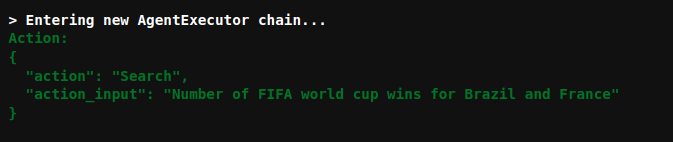

Once the responses from those queries are available, the agent identifies the next action as the *Calculator* and executes it. 

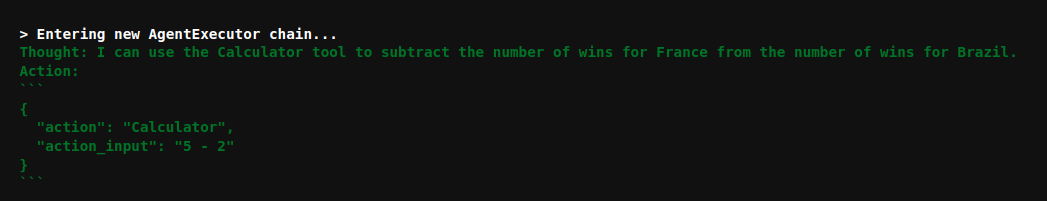

Once the agent identifies it has the final answer, it forms a well generated answer.

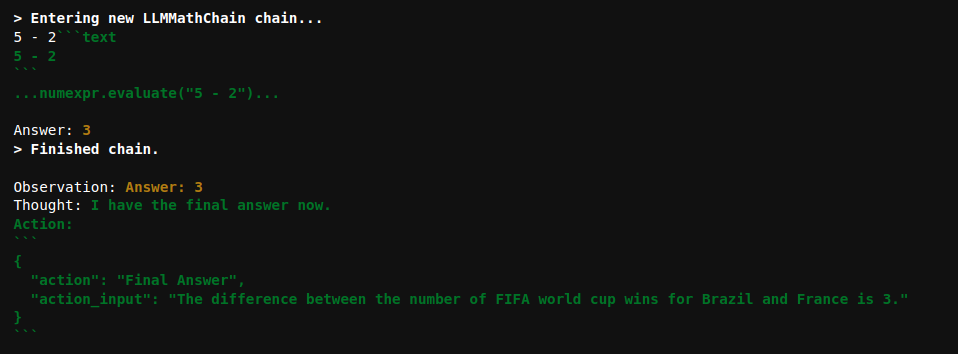

The completes our chapter for Generative AI and LLMs. Though we have just scratched the surface of whats possible via Generative AI, we hope that the examples presented in this chapter help you to understand the capabilities of LLMs and their relation to Generative AI. We recommend that the reader explore the Langchain site for updates and new tools and agents for their use cases and apply them in production scenarios following the established best practices.